# Women's clothing analysys 

Using the dataset available in kaggle:
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

I will make some basic EDA about customer satisfaction and main trends in women's clothing. This is also based on the job made by Naina Chaturvedi in:
https://medium.com/coders-mojo/project-day-16-of-30-days-of-data-analytics-with-projects-series-6992a946c868



In [69]:
# Import required libraries:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
sns.color_palette('bright')
import missingno as msno

# Import the dataset from kaggle:
path = "reviews.csv"
womens_df = pd.read_csv(path,index_col=0)
womens_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

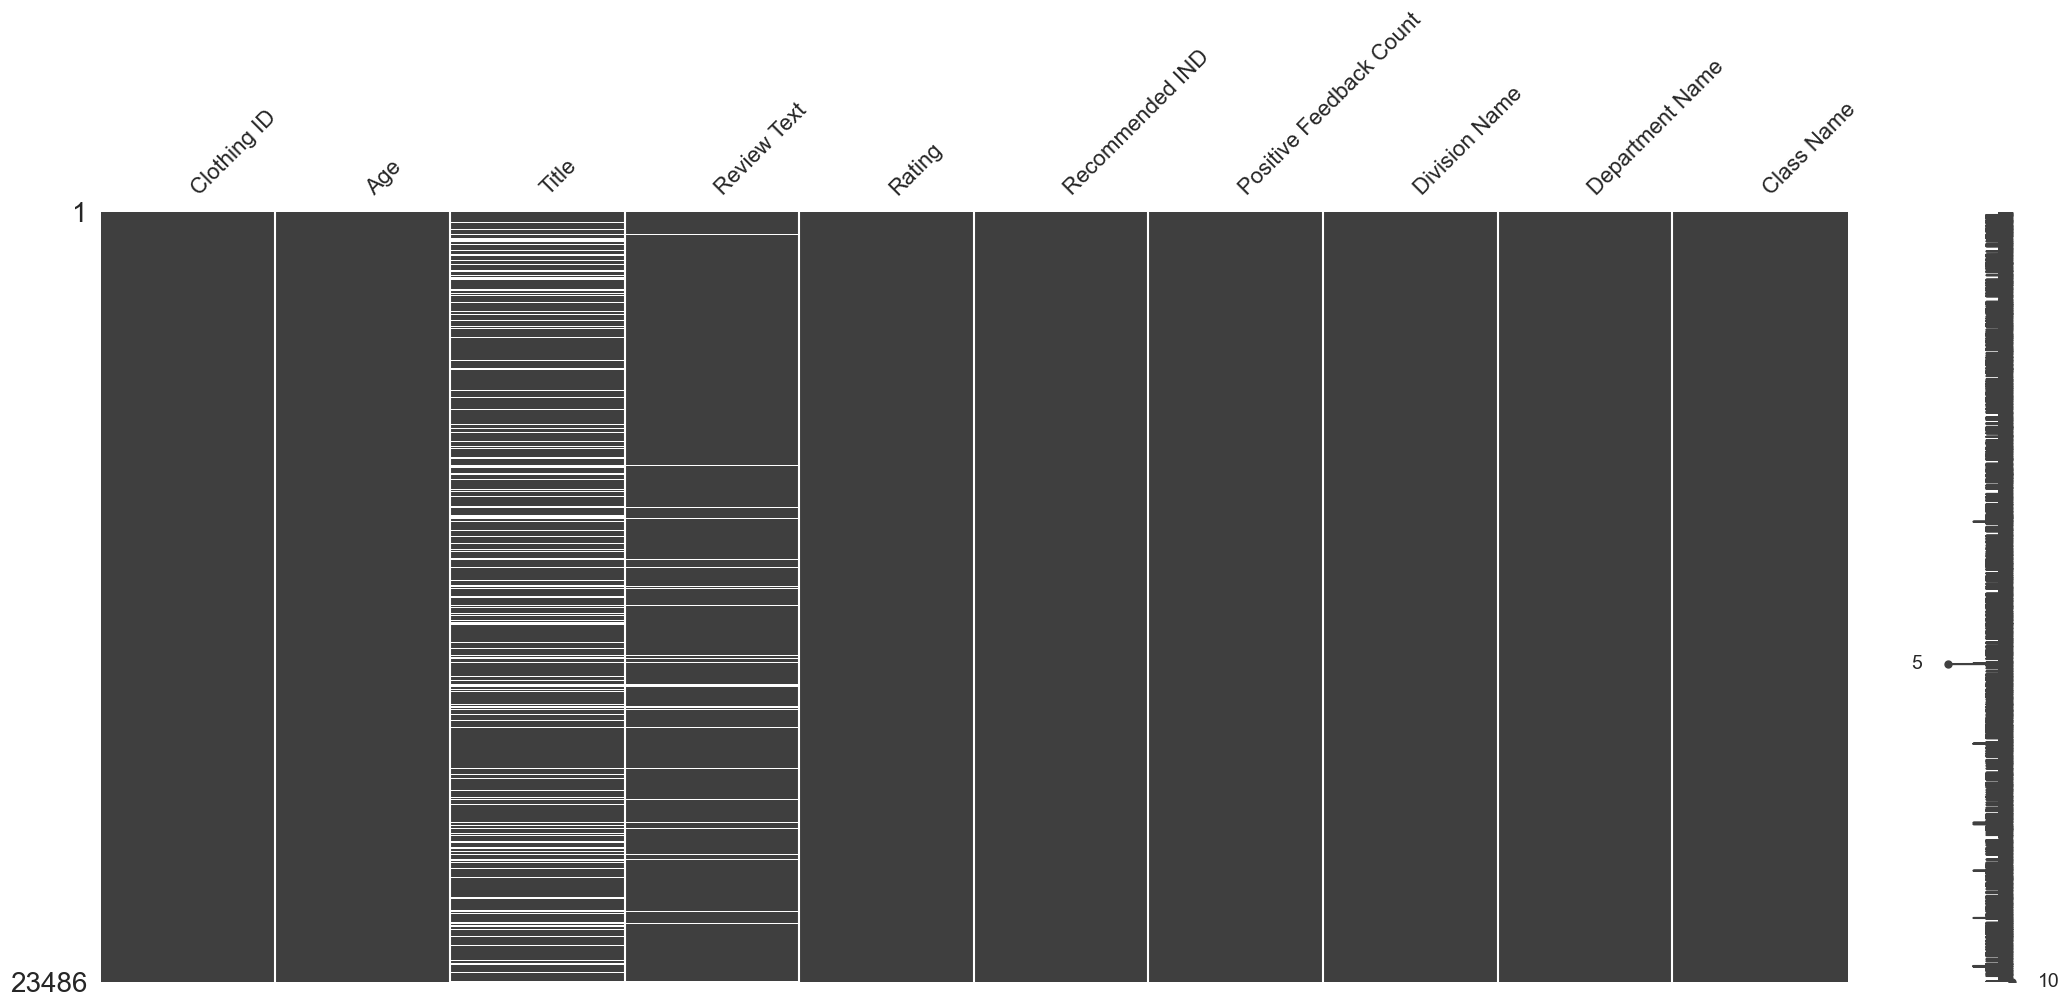

In [70]:
# Using missingno to check null values
msno.matrix(womens_df)
womens_df.info()
womens_df.isna().sum()

In [71]:
# Dropping the duplicated and null values:
womens_df.drop_duplicates(inplace=True)
womens_df.dropna(subset=['Department Name'])

# Checking data integrity
womens_df.info()
womens_df.isna().sum()
womens_df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


,count,mean,std,min,25%,50%,75%,max
Clothing ID,23465.0,918.096825,203.362035,0.0,861.0,936.0,1078.0,1205.0
Age,23465.0,43.200128,12.280712,18.0,34.0,41.0,52.0,99.0
Rating,23465.0,4.195355,1.110278,1.0,4.0,5.0,5.0,5.0
Recommended IND,23465.0,0.822203,0.382350,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23465.0,2.538206,5.704248,0.0,0.0,1.0,3.0,122.0


In [72]:
# Checking value counts in kinds of clothes
womens_df['Class Name'].value_counts()


Dresses           6312
Knits             4835
Blouses           3093
Sweaters          1428
Pants             1388
Jeans             1146
Fine gauge        1099
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [73]:
# Checking value counts in Depts
womens_df['Department Name'].value_counts()

Tops        10455
Dresses      6312
Bottoms      3798
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

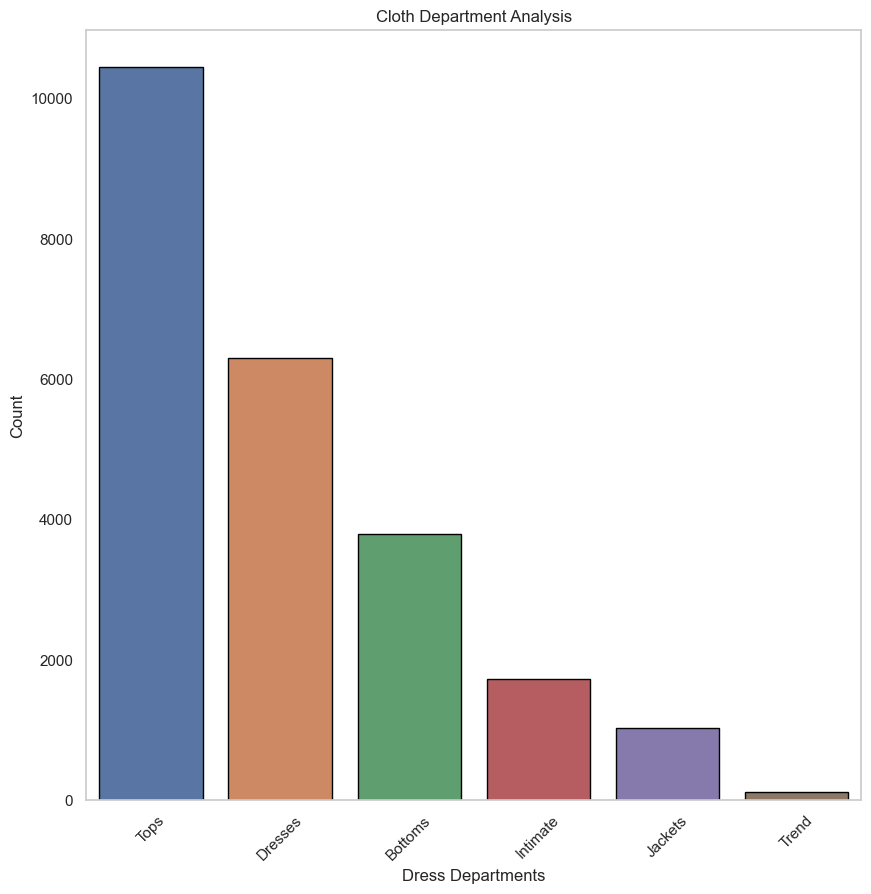

In [74]:
# Cloth deparment analysis
plt.figure(figsize=(10,10))
sns.countplot(x='Department Name',data=womens_df,order=womens_df['Department Name'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Dress Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Department Analysis')
plt.grid(False)